

# Machine Learning Classification with Python



### By: Chirag Dhankani




## Objective: 
To determine which basketball teams are most likely to make it to the semifinal round of the College Basketball Tournament known as the Final Four.
We have access to historical data and will apply different classification algorithms to accomplish this.

In this notebook we try to practice all the classification algorithms 
- KNN
- DECISION TREE
- SVM (SUPPORT VECTOR MACHINE) 
- LOGISTICS REGRESSION

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

<b>For Accuracy eveluation we'll use: </b>

- F1_Score
- Jaccard_Index
- Similarity_Score

Now Lets first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about the performance of basketball teams. The **cbb.csv** data set includes performance data about five seasons of 354 basketball teams. It includes following fields:

| Field      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| TEAM       | The Division I college basketball school                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| CONF       | The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference) |
| G          | Number of games played                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| W          | Number of games won                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| ADJOE      | Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ADJDE      | Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BARTHAG    | Power Rating (Chance of beating an average Division I team)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| EFG_O      | Effective Field Goal Percentage Shot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EFG_D      | Effective Field Goal Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| TOR        | Turnover Percentage Allowed (Turnover Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| TORD       | Turnover Percentage Committed (Steal Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| ORB        | Offensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| DRB        | Defensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| FTR        | Free Throw Rate (How often the given team shoots Free Throws)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| FTRD       | Free Throw Rate Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 2P_O       | Two-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 2P_D       | Two-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 3P_O       | Three-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| 3P_D       | Three-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ADJ_T      | Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| WAB        | Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| POSTSEASON | Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| SEED       | Seed in the NCAA March Madness Tournament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| YEAR       | Season                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |


### Load Data From CSV File


Let's load the dataset


In [2]:
df = pd.read_csv('cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
df.shape

(1406, 24)

## Add Column

Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short. 


In [4]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing


Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.


In [134]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False
7,Oklahoma,B12,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,...,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0,2016,True
343,Duke,ACC,36,25,121.2,98.9,0.9122,53.7,49.5,14.3,...,51.0,48.9,38.5,34.0,68.7,4.2,S16,4.0,2016,False
344,Miami FL,ACC,35,27,119.4,96.5,0.9203,54.2,48.3,16.5,...,53.2,46.9,37.5,34.4,67.0,6.9,S16,3.0,2016,False
345,Indiana,B10,35,27,121.3,98.4,0.9168,58.7,49.8,19.6,...,56.1,49.0,41.6,34.3,69.5,3.2,S16,5.0,2016,False
346,Maryland,B10,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,...,55.8,45.5,36.2,32.1,67.9,4.0,S16,5.0,2016,False


In [6]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

In [7]:
df1.shape

(56, 25)

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons. 


Lets plot some columns to underestand data better:


In [9]:
#Installing Seaborn Library
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



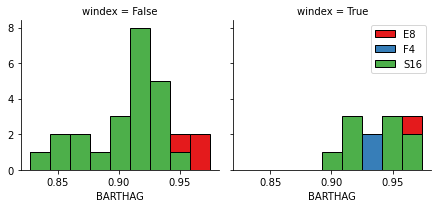

In [10]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

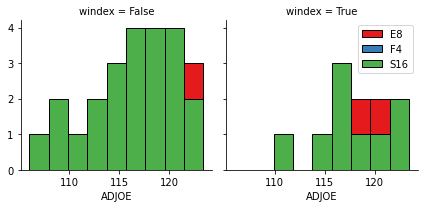

In [11]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at how Adjusted Defense Efficiency plots


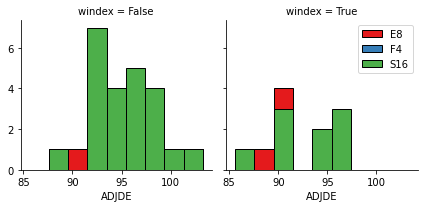

In [12]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that this data point doesn't impact the ability of a team to get into the Final Four. 


## Convert Categorical features to numerical values


Lets look at the postseason:


In [13]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [14]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Feature selection


Lets defind feature sets, X:


In [15]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


In [16]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [17]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Training and Validation


Split the data into Training and Validation data.


In [18]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Classification


Now, we will use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
by using the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression


# K Nearest Neighbor(KNN)

### we will Build a KNN model using a value of k equals five, and we will find the accuracy on the validation data (X_val and y_val)


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
k = 5
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier()

Now we've build the model using the training DataSet, now let's apply the model on validation Dataset and then we'll check the accuracy of model.

In [21]:
yknn = knn.predict(X_val)
yknn[0:5]

array(['S16', 'S16', 'S16', 'E8', 'E8'], dtype=object)

In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Validation set Accuracy: ", metrics.accuracy_score(y_val, yknn))

Train set Accuracy:  0.6363636363636364
Validation set Accuracy:  0.6666666666666666


### How to choose Right value of K
Let's Explore a method called Elbow method used to choose good value of 'K', through Visualisation we'll Check where the error is least on different k values and then we'll choose the value of K where the error is least and after which error just hover around for other values of k. 

In [69]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Error Rate')

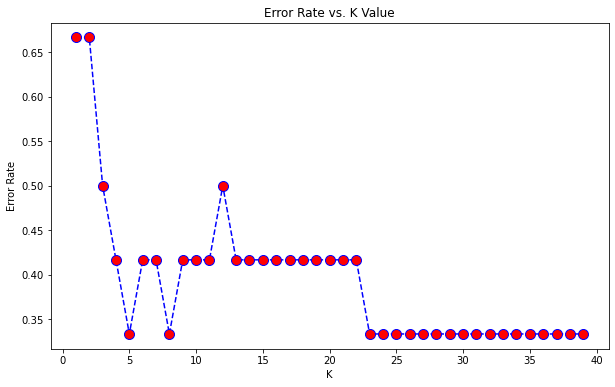

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after around K>5 the error rate just tends to hover around 0.40 Let's retrain the model with that and check the classification report

In [136]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_val)

print('WITH K=1')
print('\n')
print('\n')
print(classification_report(y_val,yknn))

WITH K=1




              precision    recall  f1-score   support

          E8       0.33      0.50      0.40         2
          F4       1.00      0.50      0.67         2
         S16       0.75      0.75      0.75         8

    accuracy                           0.67        12
   macro avg       0.69      0.58      0.61        12
weighted avg       0.72      0.67      0.68        12



That's the best accuracy we can get with different values of 'K', In sports betting industry any accuracy score more than 0.55 is considered a good score and we are getting a score of = 0.67 which is quite good.

### And Now we will Determine and print the accuracy for the first 15 values of k the on the validation data:


In [78]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score(y_val, yhat)

    
    std_acc[n-1]=np.std(yhat==y_val)/np.sqrt(yhat.shape[0])

mean_acc

array([0.33333333, 0.33333333, 0.5       , 0.58333333, 0.66666667,
       0.58333333, 0.58333333, 0.66666667, 0.58333333, 0.58333333,
       0.58333333, 0.5       , 0.58333333, 0.58333333])

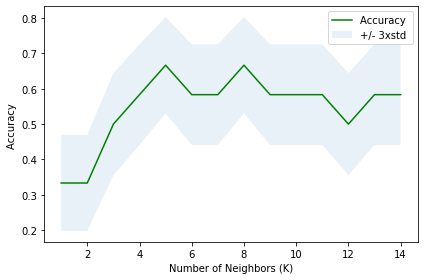

In [79]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Tree


Now we'll fit a decision tree Model on our train dataset and then we'll check it's accuracy on our validation dataset. 


In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
basketTree = DecisionTreeClassifier(criterion="entropy")
basketTree

DecisionTreeClassifier(criterion='entropy')

In [82]:
basketTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [83]:
predictionTree = basketTree.predict(X_val)

In [84]:
print (predictionTree [0:5])
print (y_val [0:5])

['S16' 'S16' 'E8' 'E8' 'S16']
['F4' 'S16' 'S16' 'S16' 'S16']


In [85]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_val, predictionTree))

DecisionTrees's Accuracy:  0.5


How to Determine the minumum value for the parameter <code>max_depth</code> that improves results? 


 By trial and testing different natural numbers on max_depth parameter, we can observe and record the best Accuracy score lets try changing max depth parameter to get a better accuracy score  

In [86]:
bestTree = DecisionTreeClassifier(criterion="entropy", max_depth=2)
bestTree

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [87]:
bestTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [88]:
bestpredictionTree = bestTree.predict(X_val)

In [89]:
print (bestpredictionTree [0:5])
print (y_val [0:5])

['S16' 'S16' 'S16' 'S16' 'S16']
['F4' 'S16' 'S16' 'S16' 'S16']


In [90]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_val, bestpredictionTree))

DecisionTrees's Accuracy:  0.6666666666666666


<b>Therefore by setting Max_depth parameter = 2 we can get the best Accurracy score of 0.66 </b>

# Support Vector Machine


Now we'll Train the support vector machine model and determine the accuracy on the validation data for each kernel.We'll find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.


In [91]:
from sklearn import svm

### Kernel Linear

In [137]:
#Kernel Linear
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_train, y_train) 

SVC(kernel='linear')

In [93]:
Linear_pred = clf1.predict(X_val)
Linear_pred [0:5]

array(['S16', 'E8', 'S16', 'E8', 'E8'], dtype=object)

In [94]:
print("linear Kernel accuracy:", metrics.accuracy_score(y_val,y_pred=Linear_pred))

linear Kernel accuracy: 0.25


### Kernel poly

In [138]:
#Kernel Poly
clf2 = svm.SVC(kernel='poly')
clf2.fit(X_train, y_train)

SVC(kernel='poly')

In [96]:
poly_pred = clf2.predict(X_val)
poly_pred [0:5]

array(['S16', 'S16', 'S16', 'S16', 'S16'], dtype=object)

In [97]:
print("poly Kernel accuracy:", metrics.accuracy_score(y_val,y_pred=poly_pred))

poly Kernel accuracy: 0.6666666666666666


### Kernel rbf

In [98]:
## Kernel RBF
clf3 = svm.SVC(kernel='rbf')
clf3.fit(X_train, y_train) 

SVC()

In [99]:
rbf_pred = clf3.predict(X_val)
rbf_pred [0:5]

array(['S16', 'S16', 'S16', 'S16', 'E8'], dtype=object)

In [100]:
print("rbf Kernel accuracy:", metrics.accuracy_score(y_val,y_pred=rbf_pred))

rbf Kernel accuracy: 0.5833333333333334


### Kernel sigmoid

In [139]:
#Kernel Sigmoid
clf4 = svm.SVC(kernel='sigmoid')
clf4.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [102]:
sigmoid_pred = clf4.predict(X_val)
sigmoid_pred [0:5]

array(['S16', 'S16', 'S16', 'E8', 'E8'], dtype=object)

In [103]:
print("sigmoid kernel accuracy:", metrics.accuracy_score(y_val,y_pred=sigmoid_pred))

sigmoid kernel accuracy: 0.5833333333333334


#### Now we'll Print and Compare Accuracy Score Among all the Kernels

In [104]:
print("linear Kernel accuracy:", metrics.accuracy_score(y_val,y_pred=Linear_pred))
print("poly Kernel accuracy:", metrics.accuracy_score(y_val,y_pred=poly_pred))
print("rbf Kernel accuracy:", metrics.accuracy_score(y_val,y_pred=rbf_pred))
print("sigmoid kernel accuracy:", metrics.accuracy_score(y_val,y_pred=sigmoid_pred))

linear Kernel accuracy: 0.25
poly Kernel accuracy: 0.6666666666666666
rbf Kernel accuracy: 0.5833333333333334
sigmoid kernel accuracy: 0.5833333333333334


 <b>  Therefor, As we can see Poly kernel in Support Vector Machine gives the best accuracy </b> 

# Logistic Regression


Now we'll Train a logistic regression model and determine the accuracy of the validation data by setting C=0.01


In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [142]:
yhat = LR.predict(X_val)
yhat

array(['F4', 'S16', 'E8', 'E8', 'E8', 'E8', 'S16', 'F4', 'E8', 'S16',
       'S16', 'S16'], dtype=object)

In [143]:
print("accuracy:", metrics.accuracy_score(y_val,y_pred=yhat))

accuracy: 0.5833333333333334


# Model Evaluation using Test set


And Now is the testing time for our models.We will Calculate the  F1 score and Jaccard Similarity score for each model from above.By using the Hyperparameter that performed best on the validation data.


In [144]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [145]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

### Load Test set for evaluation


In [112]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [113]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [114]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

** Here We will Apply each aove trained model(i.e.-Knn,DecisionTree,SVM, Logistic Regression) and we'llcheck F1_score, Jaccard_index & Similarity_score for each model on <b>Testing DataSet</b> and Log_loss in logistic regression

KNN


In [115]:
Fyknn = knn.predict(test_X)
Fyknn[0:5]

array(['S16', 'S16', 'E8', 'S16', 'S16'], dtype=object)

In [116]:
print("Test set Accuracy: ", metrics.accuracy_score(test_y, Fyknn))

Test set Accuracy:  0.5714285714285714


In [117]:
F1_score_knn = f1_score(test_y,Fyknn, average='micro') 
F1_score_knn

0.5714285714285714

In [118]:
jaccard_knn = jaccard_index(test_y, Fyknn)
jaccard_knn

0.4

Decision Tree


In [119]:
prediction_yTree = basketTree.predict(test_X)
prediction_yTree[0:5]

array(['S16', 'E8', 'E8', 'E8', 'S16'], dtype=object)

In [120]:
print("Test set Accuracy: ", metrics.accuracy_score(test_y, prediction_yTree))

Test set Accuracy:  0.7571428571428571


In [121]:
F1_score_Tree = f1_score(test_y,prediction_yTree, average='micro') 
F1_score_Tree

0.7571428571428571

In [122]:
jaccard_Tree = jaccard_index(test_y, prediction_yTree)
jaccard_Tree

0.6091954022988506

SVM


In [123]:
poly_y = clf2.predict(test_X)
poly_y [0:5]

array(['E8', 'S16', 'S16', 'S16', 'S16'], dtype=object)

In [124]:
print("Test set Accuracy: ", metrics.accuracy_score(test_y, poly_y))

Test set Accuracy:  0.6857142857142857


In [125]:
F1_score_Tree = f1_score(test_y,poly_y, average='micro') 
F1_score_Tree

0.6857142857142857

In [126]:
jaccard_Tree = jaccard_index(test_y, poly_y)
jaccard_Tree

0.5217391304347826

Logistic Regression


In [127]:
LR_y = LR.predict(test_X)
LR_y

array(['S16', 'S16', 'E8', 'E8', 'F4', 'S16', 'E8', 'S16', 'S16', 'S16',
       'S16', 'S16', 'E8', 'S16', 'E8', 'S16', 'E8', 'E8', 'F4', 'F4',
       'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'E8', 'S16', 'E8', 'S16',
       'F4', 'E8', 'F4', 'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'E8',
       'S16', 'S16', 'E8', 'S16', 'E8', 'E8', 'E8', 'F4', 'E8', 'S16',
       'S16', 'S16', 'S16', 'S16', 'E8', 'E8', 'E8', 'E8', 'E8', 'E8',
       'E8', 'S16', 'E8', 'S16', 'S16', 'S16', 'S16', 'E8', 'S16', 'S16'],
      dtype=object)

In [128]:
print("Test set Accuracy: ", metrics.accuracy_score(test_y, LR_y))

Test set Accuracy:  0.6857142857142857


In [129]:
f1_score(test_y, LR_y, average='micro') 

0.6857142857142857

In [130]:
jaccard_LR = jaccard_index(test_y, LR_y)
jaccard_LR

0.5217391304347826

In [131]:
yhat_prob = LR.predict_proba(test_X)
yhat_prob

array([[0.30393062, 0.30257571, 0.39349367],
       [0.33247931, 0.31284143, 0.35467926],
       [0.35814639, 0.32829211, 0.3135615 ],
       [0.37117283, 0.32002519, 0.30880198],
       [0.31019343, 0.35558511, 0.33422146],
       [0.3156583 , 0.3397317 , 0.34461   ],
       [0.34701869, 0.31859183, 0.33438948],
       [0.34056488, 0.30435652, 0.35507859],
       [0.3073591 , 0.31834495, 0.37429595],
       [0.31123986, 0.30842922, 0.38033092],
       [0.31094161, 0.30351656, 0.38554183],
       [0.29097532, 0.30012697, 0.40889772],
       [0.35078102, 0.32642966, 0.32278932],
       [0.28816166, 0.29802994, 0.4138084 ],
       [0.34958421, 0.31766169, 0.33275409],
       [0.33098443, 0.31835967, 0.35065589],
       [0.35363229, 0.3265723 , 0.31979541],
       [0.38108756, 0.32226688, 0.29664555],
       [0.33321637, 0.34155964, 0.32522399],
       [0.34687995, 0.34824458, 0.30487548],
       [0.32270078, 0.32684438, 0.35045483],
       [0.29163586, 0.30192138, 0.40644275],
       [0.

In [132]:
log_loss(test_y, yhat_prob)

1.03718699059278

# My Final report

| Algorithm          | Accuracy | Jaccard  | F1-score | Log Loss|
| ------------------ | -------- | -------- | -------- | --------|
| KNN                | 0.628571 | 0.628571 | 0.628571 | NA      |
| Decision Tree      | 0.771428 | 0.771428 | 0.771428 | NA      |
| SVM                | 0.685714 | 0.685714 | 0.685714 | NA      |
| LogisticRegression | 0.685714 | 0.685714 | 0.685714 | 1.037186|


## THANKYOU THE PROJECT IS COMPLETE HERE 